<a href="https://colab.research.google.com/github/Shubh23104/Encryptix/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
train_data=pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [6]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [7]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64

In [13]:
train_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [14]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19475 entries, 0 to 19474
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    19475 non-null  int64  
 1   category  19475 non-null  int64  
 2   amt       19475 non-null  float64
 3   city      19475 non-null  int64  
 4   job       19475 non-null  int64  
 5   is_fraud  19475 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.0 MB


In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15581 entries, 0 to 15580
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    15581 non-null  int64  
 1   category  15581 non-null  int64  
 2   amt       15581 non-null  float64
 3   city      15581 non-null  int64  
 4   job       15581 non-null  int64  
 5   is_fraud  15581 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 852.1 KB


In [17]:
train_data.dropna(inplace=True)

In [19]:
test_data.dropna(inplace=True)

In [31]:
print(f"Gender:{train_data['gender'].unique()}")
print(f"Category:{train_data['category'].unique()}")
print(f"City:{train_data['city'].unique()}")
print(f"Job:{train_data['job'].unique()}")

Gender:[1 0]
Category:[8 4 0 2 9 3 11 12 1 10 5 13 7 6]
City:[493 568 439 81 203 209 331 221 445 140 138 695 674 292 326 306 395 116
 303 229 472 499 602 457 789 43 655 258 335 772 810 751 638 50 784 68 61
 253 11 495 236 130 746 543 406 281 160 522 734 235 657 605 180 362 544 35
 132 232 736 25 263 82 316 678 664 168 632 770 765 516 744 584 129 257 238
 93 699 70 545 333 418 330 465 227 482 201 85 337 313 378 665 40 620 696
 435 703 150 410 448 811 526 299 10 372 700 334 88 587 809 750 213 167 230
 267 425 224 101 206 44 252 807 796 409 368 105 792 573 72 183 689 663 363
 347 329 1 111 706 598 513 466 578 365 58 808 730 423 26 673 270 242 247
 381 719 413 374 430 373 470 606 426 612 128 155 220 797 459 514 366 471
 73 300 780 586 708 147 637 47 115 383 599 529 548 463 759 45 676 92 754
 440 572 761 240 453 635 793 791 613 290 80 512 783 469 131 95 31 351 191
 106 781 135 3 148 500 802 594 367 260 669 375 287 399 650 420 13 307 117
 830 197 37 179 824 562 475 21 442 332 211 588 71 170 

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# data preprocessing for Training Data
train_data = train_data[['gender', "category", "amt", "city", "job", "is_fraud"]]

train_data.loc[:, 'category'] = le.fit_transform(train_data["category"])
train_data.loc[:, 'city'] = le.fit_transform(train_data["city"])
train_data.loc[:, 'job'] = le.fit_transform(train_data["job"])
train_data.loc[:, 'gender'] = train_data["gender"].map({'M': 0, 'F': 1})

# data preprocessing for Testing Data
test_data = test_data[['gender',"category","amt","city", "job","is_fraud"]]

test_data.loc[:, 'category'] = le.fit_transform(test_data["category"])
test_data.loc[:, 'city'] = le.fit_transform(test_data["city"])
test_data.loc[:, 'job'] = le.fit_transform(test_data["job"])
test_data.loc[:, 'gender'] = test_data["gender"].map({'M': 0, 'F': 1})

In [33]:
train_data['gender'] = train_data['gender'].astype(int)
train_data['category'] = train_data['category'].astype(int)
train_data['city'] = train_data['city'].astype(int)
train_data['job'] = train_data['job'].astype(int)

In [35]:
test_data['gender'] = test_data['gender'].astype(int)
test_data['category'] = test_data['category'].astype(int)
test_data['city'] = test_data['city'].astype(int)
test_data['job'] = test_data['job'].astype(int)

In [46]:
X_train = train_data[['gender', "category", "amt", "city", "job"]]
y_train = train_data["is_fraud"]

X_test = test_data[['gender', "category", "amt", "city", "job"]]
y_test = test_data["is_fraud"]

In [38]:
train_data.shape

(19475, 6)

In [39]:
train_data.columns

Index(['gender', 'category', 'amt', 'city', 'job', 'is_fraud'], dtype='object')

In [40]:
test_data.shape

(15581, 6)

In [41]:
test_data.columns

Index(['gender', 'category', 'amt', 'city', 'job', 'is_fraud'], dtype='object')

<Axes: >

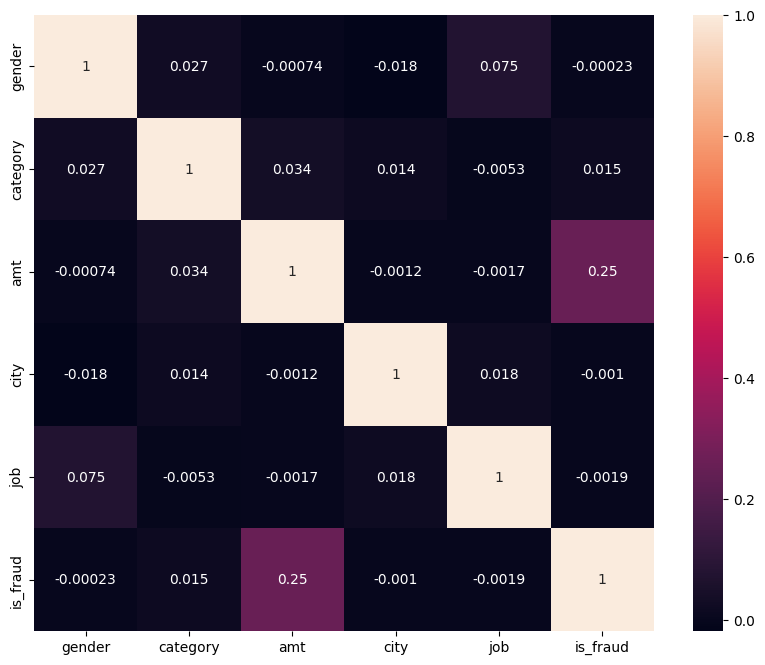

In [43]:
plt.figure(figsize=(10,8))
corr=train_data.corr()
sns.heatmap(corr,annot=True)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)
prediction=model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,prediction)

0.9971118670175213

In [50]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression()
model2=lr.fit(X_train,y_train)
prediction2=model2.predict(X_test)

In [54]:
accuracy_score(y_test,prediction2)

0.9959566138245298

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
dt=DecisionTreeRegressor()
model3=dt.fit(X_train,y_train)
prediction3=model3.predict(X_test)

In [57]:
accuracy_score(y_test,prediction3)

0.9963416982221937